In [8]:
import json
import numpy as np

files = ["dataset_1.json", "dataset_2.json", "dataset_3.json"]
datalist = []

for file in files:
    with open(file, "r") as f:
        datalist.append(json.load(f)[0:50])  # Store each file's data, (only the first 50 entries)



datasets = np.array([0,0,0])  

for i in range(3):
    datasets[i] = np.sum(datalist[i])      #getting total number of heads


print(datasets)



[22 16 10]


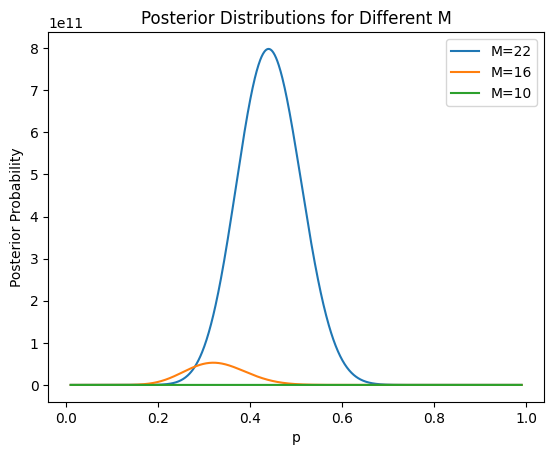

For M=22: Expectation=0.4423076923076923, Variance=0.004654181087417662
For M=16: Expectation=0.3269230769230769, Variance=0.004151780730155186
For M=10: Expectation=0.21153846153846154, Variance=0.0031469800156302334
Batch 1: Expectation=0.9423076923076923, Variance=0.0010257340627442223, Fisher Information=0.019999999999999997


In [10]:
import matplotlib.pyplot as plt
from scipy.special import beta, gamma
from scipy.stats import beta as beta_dist
from math import comb, log, factorial, exp

# Assuming datasets are loaded as lists of heads counts
# datasets = [dataset1, dataset2, dataset3]  # Replace with actual data loading

def factorial_product(a, b, c):          #allows us to calculate products of gamma functions without overflow
    log_prod = sum(log(factorial(abs(x))) * (1 if x > 0 else -1) for x in (a, b, c))
    return exp(log_prod)

def likelihood(M, N, p):
    return factorial_product(N+2, -M-1, -N+M-1) * p**M * (1 - p)**(N - M) * comb(N,M)

def posterior(M, N, p):
    return likelihood(M, N, p) * 1 / N  # Uniform prior P(p) = 1/N

def expectation_variance(M, N):
    alpha = M + 1
    beta_param = N - M + 1
    expectation = alpha / (alpha + beta_param)
    variance = (alpha * beta_param) / ((alpha + beta_param)**2 * (alpha + beta_param + 1))
    return expectation, variance

def fisher_information(M, N):
    alpha = M + 1
    beta_param = N - M + 1
    return (alpha - 1) / (alpha + beta_param - 2)**2 + (beta_param - 1) / (alpha + beta_param - 2)**2

N = 50
batch_size = 50
p_values = np.linspace(0.01, 0.99, 1000)

for M in datasets:
    posterior_values = [posterior(M, N, p) for p in p_values]
    plt.plot(p_values, posterior_values, label=f'M={M}')

plt.xlabel('p')
plt.ylabel('Posterior Probability')
plt.title('Posterior Distributions for Different M')
plt.legend()
plt.show()

for M in datasets:
    exp, var = expectation_variance(M, N)
    print(f'For M={M}: Expectation={exp}, Variance={var}')

# Batch processing
for i in range(0, N, batch_size):
    batch_M = sum(datasets[i:i+batch_size])
    batch_N = batch_size
    exp, var = expectation_variance(batch_M, batch_N)
    fisher = fisher_information(batch_M, batch_N)
    print(f'Batch {i//batch_size + 1}: Expectation={exp}, Variance={var}, Fisher Information={fisher}')


#overflow issue i think

B) Numerically checking Stirling's approximation. It's even better than I was expecting.

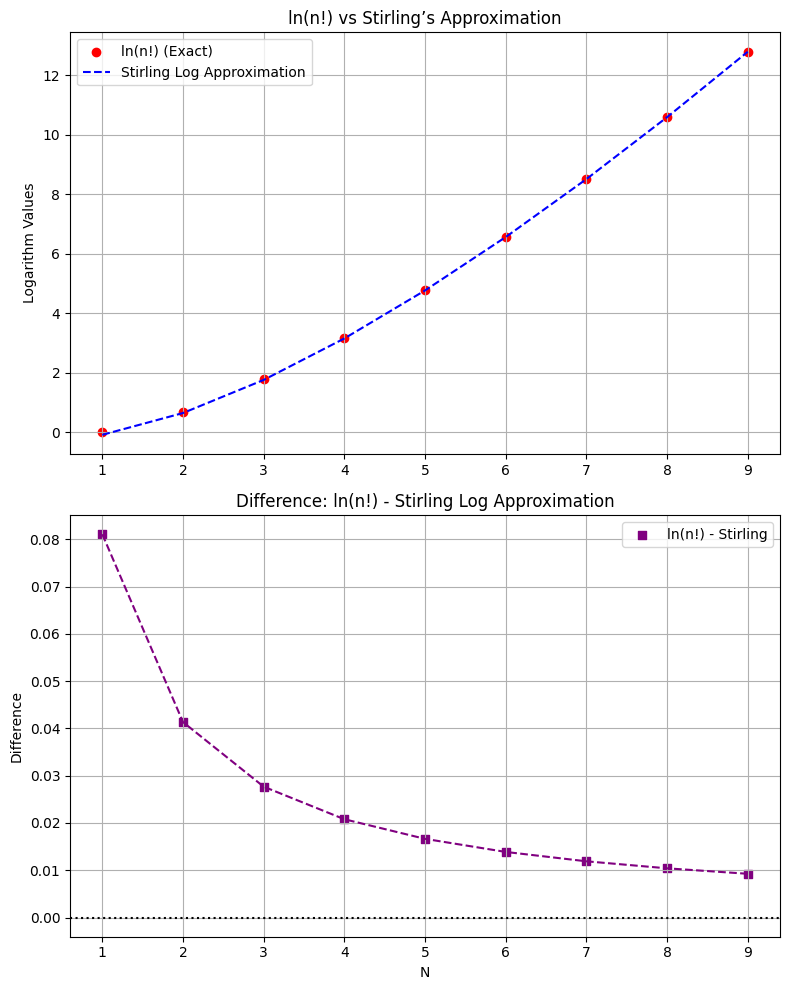

In [11]:
import math

# Stirling's log approximation function
def stirling_log(n):
    return n * np.log(n) - n + 0.5 * np.log(2 * np.pi * n)

# Range of N values
N_values = np.arange(1, 10)  # Using a larger range to see the accuracy

# Compute ln(n!) using gamma function's logarithm
ln_factorial = np.array([math.lgamma(n + 1) for n in N_values])  # ln(n!) = lgamma(n+1)
stirling_log_values = np.array([stirling_log(n) for n in N_values])

# Create a (2,1) plot
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# First plot: ln(n!) vs Stirling's Log Approximation
axes[0].scatter(N_values, ln_factorial, color='red', label="ln(n!) (Exact)", marker='o')
axes[0].plot(N_values, stirling_log_values, label="Stirling Log Approximation", linestyle='dashed', color='blue')
axes[0].set_ylabel("Logarithm Values")
axes[0].set_title("ln(n!) vs Stirling’s Approximation")
axes[0].legend()
axes[0].grid()

# Second plot: Difference between ln(n!) and Stirling's Approximation
difference = ln_factorial - stirling_log_values
axes[1].scatter(N_values, difference, color='purple', marker='s', label="ln(n!) - Stirling")
axes[1].plot(N_values, difference, color='purple', linestyle='dashed')
axes[1].axhline(0, color='black', linestyle='dotted')
axes[1].set_xlabel("N")
axes[1].set_ylabel("Difference")
axes[1].set_title("Difference: ln(n!) - Stirling Log Approximation")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()
